# Practice question: Externality

In [131]:
import random
import sympy
from sympy import Symbol, Eq, Add, Mul, Derivative, simplify, UnevaluatedExpr, S, srepr, Pow, sqrt
import threading
import ipywidgets as widgets
from IPython.display import HTML, Javascript, display
sympy.init_printing(order='rev-lex')

def initialize():
    "Creates a button that generates a new question"
    display(HTML(
        '''
            <script>
                code_show = false;
                function restart_run_all(){
                    IPython.notebook.kernel.restart();
                    setTimeout(function(){
                        IPython.notebook.execute_all_cells();
                    }, 10)
                }
            </script>
            <button onclick="restart_run_all()">Generate Question</button>
        '''
    ))


v = Symbol('v')
w = Symbol('w')
Y_1 = Symbol('Y_1')
Y_2 = Symbol('Y_2')
one = Symbol('1')

p_1 = Symbol('p_1')
p_2 = Symbol('p_2')

c_1 = Symbol('c_1')
c_2 = Symbol('c_2')

pi_1 = Symbol('pi_1')
pi_2 = Symbol('pi_2')

d = Symbol('d')
dv = Symbol('d v')
dw = Symbol('d w')
dpi_1 = Symbol('d pi_1')
dpi_2 = Symbol('d pi_2')


initialize()

In [132]:
a = random.randint(2, 10)
b = random.randint(2, 10)
p1 = random.randint(2, 10)
p2 = random.randint(2, 10)
c1 = random.randint(1, p1 - 1)
c2 = random.randint(1, p2 - 1)

# Question

A shisha bar (Firm 1) has opened just below a gym (Firm 2). 
   
The shisha bar produces smoke $Y_1$ that is a an economic good for its consumers. The quantity of smoke is given by

In [133]:
Y1 = v**UnevaluatedExpr(one / a)
Eq(Y_1, Y1)

where $v$ corresponds to some input (including for example charcoal, tobacco and labor). A unit of input costs

In [134]:
Eq(c_1, c1)

The shisha bar charges its consumers

In [135]:
Eq(p_1, p1)

per unit of smoke $Y_1$

\
The smoke is a negative externality to those going to the gym upstairs. They cannot grow mucle $Y_2$ as efficiently as before.

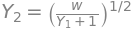

In [136]:
Y2 = (w / (1 + Y_1))**UnevaluatedExpr(one / b)
Eq(Y_2, Y2)

where $w$ denotes some input in the production of $Y_2$. A unit of $w$ cost the gym

In [137]:
Eq(c_2, c2)

Members are willing to pay

In [138]:
Eq(p_2, p2)

per unit of muscle $Y_2$.

\
Your goal is to measure the loss that the gym incurs due to the externality:
  1. Find the shisha bar's optimal production of smoke.
  2. Find the gym's profit in presence of the externality.
  3. Find the gym's profit in absence of the externality.
  4. Compare.

# Answer

## 1. Optimal $Y_1$

The shisha bar maximizes

In [139]:
Eq(pi_1, p_1 * Y_1 - c_1 * v)

In [140]:
Eq(pi_1, p1 * Y1 - c1 * v)

The first order condition give

In [141]:
Eq(d*pi_1 / dv, 0)

In [142]:
dY1 = UnevaluatedExpr(v**((one - a) / a) / a)
Eq(p1 * dY1 - c1, 0)

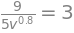

In [143]:
dY1 = v**(-(a-1) / a) / a
Eq(p1 * dY1, c1)

In [144]:
dY1 = v**((a-1) / a)
Eq(dY1, p1 / c1 / a)

The optimal input $v$ is

In [145]:
res=(p1 / c1 / a)**(a / (a-1))
Eq(v, res)

With

In [146]:
Eq(Y_1, Y1)

the amount of smoke the shisha bar produces is

In [147]:
Y1_res = res**(1/a)
Eq(Y_1, Y1_res)

## 2. Gym's profit under externality
The gym maximizes

In [148]:
Eq(pi_2, p_2 * Y_2 - c_2 * w)

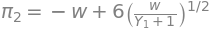

In [149]:
Eq(pi_2, p2 * Y2 - c2 * w)

In [150]:
Y2 = (w / (1 + Y1_res))**UnevaluatedExpr(one / b)
Eq(pi_2, p2 * Y2 - c2 * w)

The first order condition gives

In [151]:
Eq(d*pi_2 / dw, 0)

In [152]:
dY2 = UnevaluatedExpr(w**((one - b) / b) / b / (1 + Y1_res))
Eq(p2 * dY2 - c2, 0)

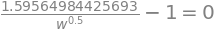

In [153]:
dY2 = w**((1 - b) / b) / b / (1 + Y1_res)
Eq(p2 * dY2 - c2, 0)

In [154]:
w_star = 1 / b / (1 + Y1_res) / c2
Eq(w**((1 - b) / b), w_star)

In [155]:
w_star = w_star**(b / (1 - b))
Eq(w, w_star)

Recall the gym's profit is

In [156]:
Y2 = (w / (1 + Y1_res))**UnevaluatedExpr(one / b)
Eq(pi_2, p2 * Y2 - c2 * w)

So

In [157]:
Y2 = (w_star / (1 + Y1_res))**UnevaluatedExpr(one / b)
Eq(pi_2, p2 * Y2 - c2 * w_star)

In [158]:
Y2 = (w_star / (1 + Y1_res))**(1 / b)
profit1 = p2 * Y2 - c2 * w_star
Eq(pi_2, profit1)

## Step 3: Gym's profit without externality
The shisha is not productin smoke:

In [159]:
Y1 = 0
Eq(Y_1, Y1)

In [160]:
Y_2 = w**UnevaluatedExpr(one / b)
Y_2

The gym's profit is

In [161]:
Eq(pi_2, p_2 * Y_2 - c_2 * w)

In [162]:
Eq(pi_2, p2 * Y_2 - c2 * w)

The first order condition gives

In [163]:
Eq(d*pi_2 / dw, 0)

In [164]:
dY2 = UnevaluatedExpr(w**((one - b) / b) / b)
Eq(p2 * dY2 - c2, 0)

In [165]:
dY2 = UnevaluatedExpr(w**((one - b) / b) / b)
Eq(p2 * dY2, c2)

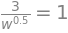

In [166]:
dY2 = w**((1 - b) / b) / b
Eq(p2 * dY2, c2)

In [167]:
dY2 = w**((1 - b) / b) / b
Eq(w**((1 - b) / b) , b * c2 / p2)

In [168]:
w_star = b * c2 / p2
w_star = w_star**(b / (1 - b))
Eq(w, w_star)

The profit is

In [169]:
Y_2 = w**UnevaluatedExpr(one / b)
Eq(pi_2, p2 * Y_2 - c2 * w)

In [170]:
Y_2 = w_star**UnevaluatedExpr(one / b)
Eq(pi_2, p2 * Y_2 - c2 * w_star)

In [171]:
Y_2 = w_star**(1 / b)
profit2 = p2 * Y2 - c2 * w_star
Eq(pi_2, p2 * Y_2 - c2 * w_star)

## Step 4: Compare

Because of the externality, the gym has lost

In [172]:
profit2 - profit1